# Adsorption Desorption process of Fenol solution in activated carbon
For this experiment we prepared a set of solutions with different mass of activated carbon in the same volume ($\sim 40$ mL) of phenol at $200$ ppm.  
(Note that in this context ppm = mg/L)  
From this samples we where given a solution with the carbon filtered out to be measured.  
We will use the spectrophotometer.  


## Task 1: Prepare Standard Solutions

First of all we prepare some standard solutions of known phenol concentration by dilution of the $200$ ppm solution with demineralized water.  
These solutions are used to get a calibration curve, in our case a linear relationship is sufficient, between concentration and the measurment of the spectrophotometer (absorbance).  
To prepare the solutions all standard solutions are of $20$ mL, with varying shares of phenol solution and water.  
Very simple math behind dilution:
$$
\text{Desired concentration} = \frac{\text{initial concentration} \cdot \text{Volume of Phenol}}{\text{Total Solution Volume}}
$$
Which means that:
$$
\text{Volume of Phenol} = \frac{20mL}{200 ppm}\cdot \text{Desired C}
$$
And subsequently 
$$
V_\text{water} = 20 - V_\text{phenol}
$$  
So for istance the $10$ ppm solution will be made with $1$ mL of phenol solution and $19$ mL of water.  


Quando ce lo manda metto i dati delle standard  

## Task 2: Set up the spectrophotometer


### Phenol Spectra
First of all we use a cople of water samples to align detectors and zero the spectrophotometer.  
We then put in the measuring place one with a phenol solution and we start a *wavelength scan*. This provides the emission spectra of the phenol and is used to get the peak, which is $\sim 270 nm$. All the following measures will be done on this wavelength.

### Calibration and Measurment
The software of the spectrophotometer is programmed to get a certain number of standard solutions to get a calibration curve and then take some other samples and automatically applies the calibration.  
The system is zeroed with a water sample in.
We therefore had to, one by one, transfer the solution into plastic vials and load them into the spectrophotometer for measurment.  
First the standard: 0, 10, 25, 50, 70 and 100 ppm of phenol,  
then the samples: 50, 60, 70, 80, 90, 110, 120 mg of carbon  
We automaticcaly obtain the concentrations.

In [95]:
import csv
import numpy as np
from tabulate import tabulate

# Read CSV
file_path = './Lab 2 Data/batch_samples.csv'
with open(file_path, mode='r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Process header (skip first column)
header_raw = rows[0][1:]
header = [h.strip() for h in header_raw]

# Clean variable names (up to the first bracket)
var_names = []
for h in header:
    base = h.split('[')[0].strip().replace('-', '_')
    if base and base.isidentifier():
        var_names.append(base)
    else:
        raise ValueError(f"Invalid header: '{h}'")

# Convert the data block (excluding first column) to float NumPy array
data = np.array([[float(val) for val in row[1:len(var_names)+1]] for row in rows[1:]])

# Assign each column to a variable
for i, name in enumerate(var_names):
    globals()[name] = data[:, i]

# Print table for reference
print(tabulate(rows[1:], headers=rows[0], tablefmt="grid"))


+---------+-------------------+--------------------+--------------------+-----------------------------+
|   name  |    mass_empty [g] |    mass_carbon [g] |    mass_liquid [g] |    measurement [ppm = mg/L] |
+=========+===================+====================+====================+=============================+
|     120 |            11.518 |              0.115 |             40.041 |                        18.7 |
+---------+-------------------+--------------------+--------------------+-----------------------------+
|     110 |            11.604 |              0.113 |             40.757 |                        25.7 |
+---------+-------------------+--------------------+--------------------+-----------------------------+
|      90 |            11.593 |              0.092 |             40.426 |                        46.1 |
+---------+-------------------+--------------------+--------------------+-----------------------------+
|      80 |            11.473 |              0.085 |            

### Task 3: Data Analysis

#### Evaluate the mass of absorbed phenol per mass of carbon
This can be done by using:
$$
F_{abs} = (C_i - C_f) \cdot \frac{V}{m_c}
$$
where:  
- $C_i$: Initial concentration [ppm]
- $C_f$: Final concentration measured [ppm]
- $V$: Volume of the solution [L]
- $m_c$: Mass of carbon [mg]

In [96]:
density = 988 #g/L
volumes = mass_liquid/density
mass_carbon_mg = mass_carbon * 1000 # convert to mg
F_abs = (200 - measurement) * volumes / (mass_carbon_mg)

# Show a table of the results
print("\nResults:")
results = np.column_stack((rows[1:], F_abs))
rows[0].append("F_abs")
print(tabulate(results, headers=rows[0], tablefmt="grid"))



Results:
+---------+-------------------+--------------------+--------------------+-----------------------------+-----------+
|   name  |    mass_empty [g] |    mass_carbon [g] |    mass_liquid [g] |    measurement [ppm = mg/L] |     F_abs |
+=========+===================+====================+====================+=============================+===========+
|     120 |            11.518 |              0.115 |             40.041 |                        18.7 | 0.0638922 |
+---------+-------------------+--------------------+--------------------+-----------------------------+-----------+
|     110 |            11.604 |              0.113 |             40.757 |                        25.7 | 0.0636303 |
+---------+-------------------+--------------------+--------------------+-----------------------------+-----------+
|      90 |            11.593 |              0.092 |             40.426 |                        46.1 | 0.068447  |
+---------+-------------------+--------------------+----------

#### Plot and fit
We then plotted the results and seen that there is a value that swkes the results (the "90").  
It was therefore discarted

In [97]:
# Remove the discarded point from the arrays
measurement_g = measurement / 1000 # mg/L --> g/L
measurement_clean = np.delete(measurement_g, i_discard)
F_abs_clean = np.delete(F_abs, i_discard)

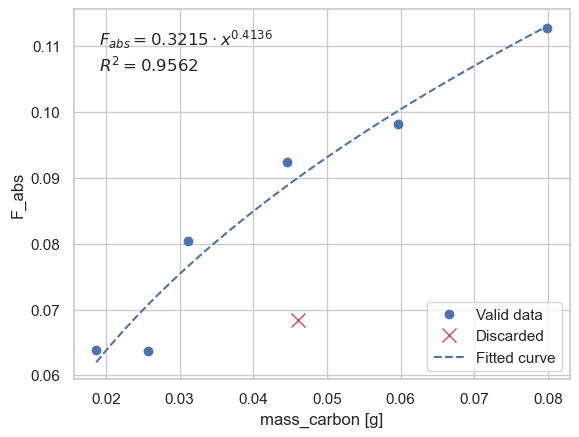

In [99]:
import matplotlib.pyplot as plt

# Index of the discarded point
i_discard = 2  # example

# Plot all valid points except the discarded one
plt.plot(np.delete(measurement_g, i_discard), np.delete(F_abs, i_discard), 'bo', label='Valid data')

# Plot the discarded point as a red cross
plt.plot(measurement_g[i_discard], F_abs[i_discard], 'rx', markersize=10, linestyle='', label='Discarded')

# Fit to a power law
from scipy.optimize import curve_fit

# --- Fit to power law ---
def power_law(x, a, b):
    return a * x ** b

# Perform the fit
params, covariance = curve_fit(power_law, measurement_clean, F_abs_clean)
a, b = params

# Predict fitted values
F_abs_pred = power_law(measurement_clean, a, b)

# Compute R² manually
ss_res = np.sum((F_abs_clean - F_abs_pred) ** 2)
ss_tot = np.sum((F_abs_clean - np.mean(F_abs_clean)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate fitted curve
x_fit = np.linspace(min(measurement_clean), max(measurement_clean), 100)
y_fit = power_law(x_fit, a, b)

# Plot the fitted curve
plt.plot(x_fit, y_fit, 'b--', label='Fitted curve')

# Annotate equation and R² on the plot
eq_text = f"$F_{{abs}} = {a:.4g} \cdot x^{{{b:.4f}}}$\n$R^2 = {r_squared:.4f}$"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Labels and legend
plt.xlabel("mass_carbon [g]")
plt.ylabel("F_abs")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
